* Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
combine=[train,test]

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


we can see that there are some null values available in Age,Cabin and Embarked section

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we can see that maximum age of the person travelling is 80 and minimum age is 0.4(approx 5 months) and average age of the person travelling in the ship is 29.699.
Average price of the ticket is 32 with the most expensive ticket priced at 512 and the cheapest at 0.

* Data cleaning

In [13]:
# get_dummies function
def dummies(col,train,test):
    train_dum = pd.get_dummies(train[col])
    test_dum = pd.get_dummies(test[col])
    train = pd.concat([train, train_dum], axis=1)
    test = pd.concat([test,test_dum],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train, test

# get rid of the useless cols
dropping = ['PassengerId', 'Name', 'Ticket','Cabin']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
print(train.Sex.value_counts(dropna=False))
train, test = dummies('Sex', train, test)
# cos the male survival rate is so low, delete the male col
train.drop('male',axis=1,inplace=True)
test.drop('male',axis=1,inplace=True)

male      577
female    314
Name: Sex, dtype: int64


In [16]:
train.Age.isnull().sum()

177

177 missing values in Age column so let's clean it first

In [17]:
nan=train[train.Age.isnull()]

In [18]:
nan.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female
5,0,3,NaN,0,0,8.4583,Q,0
17,1,2,NaN,0,0,13.0000,S,0
19,1,3,NaN,0,0,7.2250,C,1
26,0,3,NaN,0,0,7.2250,C,0
28,1,3,NaN,0,0,7.8792,Q,1


In [19]:
train.Age.mean()

29.69911764705882

In [20]:
#dealing the missing values for Age in train dataset
nan_num = train['Age'].isnull().sum()
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-age_std, age_mean+age_std, size=nan_num)
train['Age'][train['Age'].isnull()==True] = filling

# dealing the missing values in test dataset
nan_num = test['Age'].isnull().sum()
age_mean = test['Age'].mean()
age_std = test['Age'].std()
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
test['Age'][test['Age'].isnull()==True]=filling

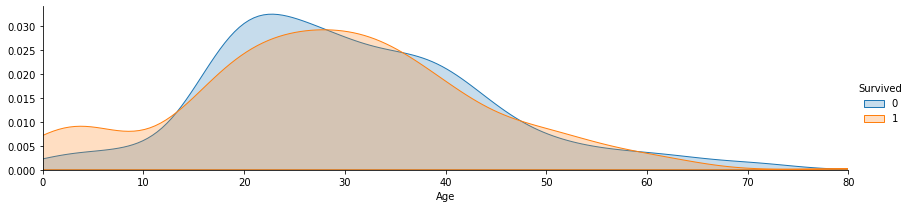

In [21]:
import seaborn as sns
s = sns.FacetGrid(train,hue='Survived',aspect=4)
s.set(xlim=(0,train['Age'].max()))
s.map(sns.kdeplot,'Age',shade=True)
s.add_legend()

from the graph above we can see that the survival rate of children and seniors is high and the survival rate of middle aged people (15-35) is low as compared to them

In [22]:
def under15(row):
    result = 0.0
    if row<15:
        result = 1.0
    return result
def young(row):
    result = 0.0
    if row>=15 and row<35:
        result = 1.0
    return result

train['under15'] = train['Age'].apply(under15)
test['under15'] = test['Age'].apply(under15)
train['young'] = train['Age'].apply(young)
test['young'] = test['Age'].apply(young)

train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

In [23]:
train.head(10)

,Survived,Pclass,SibSp,Parch,Fare,Embarked,female,under15,young
0,0,3,1,0,7.2500,S,0,0.0,1.0
1,1,1,1,0,71.2833,C,1,0.0,0.0
2,1,3,0,0,7.9250,S,1,0.0,1.0
3,1,1,1,0,53.1000,S,1,0.0,0.0
4,0,3,0,0,8.0500,S,0,0.0,0.0
5,0,3,0,0,8.4583,Q,0,0.0,1.0
6,0,1,0,0,51.8625,S,0,0.0,0.0
7,0,3,3,1,21.0750,S,0,1.0,0.0
8,1,3,0,2,11.1333,S,1,0.0,1.0
9,1,2,1,0,30.0708,C,1,1.0,0.0


In [24]:
train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']

train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [25]:
train.head(10)

,Survived,Pclass,Fare,Embarked,female,under15,young,family
0,0,3,7.2500,S,0,0.0,1.0,1
1,1,1,71.2833,C,1,0.0,0.0,1
2,1,3,7.9250,S,1,0.0,1.0,0
3,1,1,53.1000,S,1,0.0,0.0,1
4,0,3,8.0500,S,0,0.0,0.0,0
5,0,3,8.4583,Q,0,0.0,1.0,0
6,0,1,51.8625,S,0,0.0,0.0,0
7,0,3,21.0750,S,0,1.0,0.0,4
8,1,3,11.1333,S,1,0.0,1.0,2
9,1,2,30.0708,C,1,1.0,0.0,1


In [26]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [27]:
train.Embarked.isnull().sum()
# 2 missing value
train.Embarked.value_counts()
# fill the majority val,'s', into missing val col
train['Embarked'].fillna('S',inplace=True)

# c has higher survival rate, drop the other two
train,test = dummies('Embarked',train,test)
train.drop(['S','Q'],axis=1,inplace=True)
test.drop(['S','Q'],axis=1,inplace=True)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

def modeling(clf,ft,target):
    acc = cross_val_score(clf,ft,target,cv=kf)
    acc_lst.append(acc.mean())
    return 

accuracy = []
def ml(ft,target,time):
    accuracy.append(acc_lst)

    #logisticregression
    logreg = LogisticRegression()
    modeling(logreg,ft,target)
    #RandomForest
    rf = RandomForestClassifier(n_estimators=50,min_samples_split=4,min_samples_leaf=2)
    modeling(rf,ft,target)
    #svc
    svc = SVC()
    modeling(svc,ft,target)
    #knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    modeling(knn,ft,target)

    
    # see the coefficient
    logreg.fit(ft,target)
    feature = pd.DataFrame(ft.columns)
    feature.columns = ['Features']
    feature["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
    print(feature)
    return 

In [29]:
train_ft=train.drop('Survived',axis=1)
train_y=train['Survived']
#set kf
kf = KFold(n_splits=3)
acc_lst = []
ml(train_ft,train_y,'test_1')

  Features  Coefficient Estimate
0   Pclass             -0.909110
1     Fare              0.003589
2   female              2.708942
3  under15              1.913330
4    young              0.436626
5   family             -0.296496
6        C              0.332950


In [30]:
train_ft_2=train.drop(['Survived','young'],axis=1)
test_2 = test.drop('young',axis=1)
train_ft.head()

# ml
kf = KFold(n_splits=3)
acc_lst=[]
ml(train_ft_2,train_y,'test_2')

  Features  Coefficient Estimate
0   Pclass             -0.833692
1     Fare              0.003806
2   female              2.715016
3  under15              1.665432
4   family             -0.308744
5        C              0.354044


In [31]:
train_ft_3=train.drop(['Survived','C'],axis=1)
test_3 = test.drop('C',axis=1)

# ml
kf = KFold(n_splits=3)
acc_lst = []
ml(train_ft_3,train_y,'test_3')

  Features  Coefficient Estimate
0   Pclass             -0.925974
1     Fare              0.004248
2   female              2.712738
3  under15              1.947833
4    young              0.447494
5   family             -0.305804


In [32]:
accuracy_df=pd.DataFrame(data=accuracy,
                         index=['test1','test2','test3'],
                         columns=['logistic','rf','svc','knn'])
accuracy_df

,logistic,rf,svc,knn
test1,0.786756,0.819304,0.655443,0.748597
test2,0.785634,0.811448,0.655443,0.753086
test3,0.789001,0.817059,0.655443,0.749719


since we get the most accuracy in random forrest regression with test 3, we will use it to implement it on the test dataset

# Submission

In [33]:
rf = LogisticRegression()
rf.fit(train_ft_3,train_y)
rf_pred = rf.predict(test_3)
print(rf.score(train_ft_3,train_y))


0.797979797979798


In [34]:
test = pd.read_csv('test.csv')
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": rf_pred
    })

In [35]:
submission.to_csv("titanic.csv", index=False)
